In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [10]:
dataset=pd.read_csv("dataset/Unemployment in India.csv")
print(dataset.head())
print(dataset.isnull().sum())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  
Region                                      28
 Date                             

In [11]:
dataset=dataset.rename(columns={dataset.columns[0]:'Region',dataset.columns[1]:'Date',dataset.columns[2]:'Frequency'
                                ,dataset.columns[3]:'Unemployment Rate',dataset.columns[4]:'Estimated Employed',
                                dataset.columns[5]:'Labour Participation',dataset.columns[6]:'Area'})
# dataset["Region"][0]
dataset=dataset.dropna()

In [12]:
region=dataset["Region"].unique()
area=dataset['Area'].unique()
print(region)

['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'Chandigarh']


In [ ]:
dataset=dataset.dropna()
# dataset.fillna(0,inplace=True)
# dataset.fillna(dataset.mean(),inplace=True)
dataset.isnull().sum()

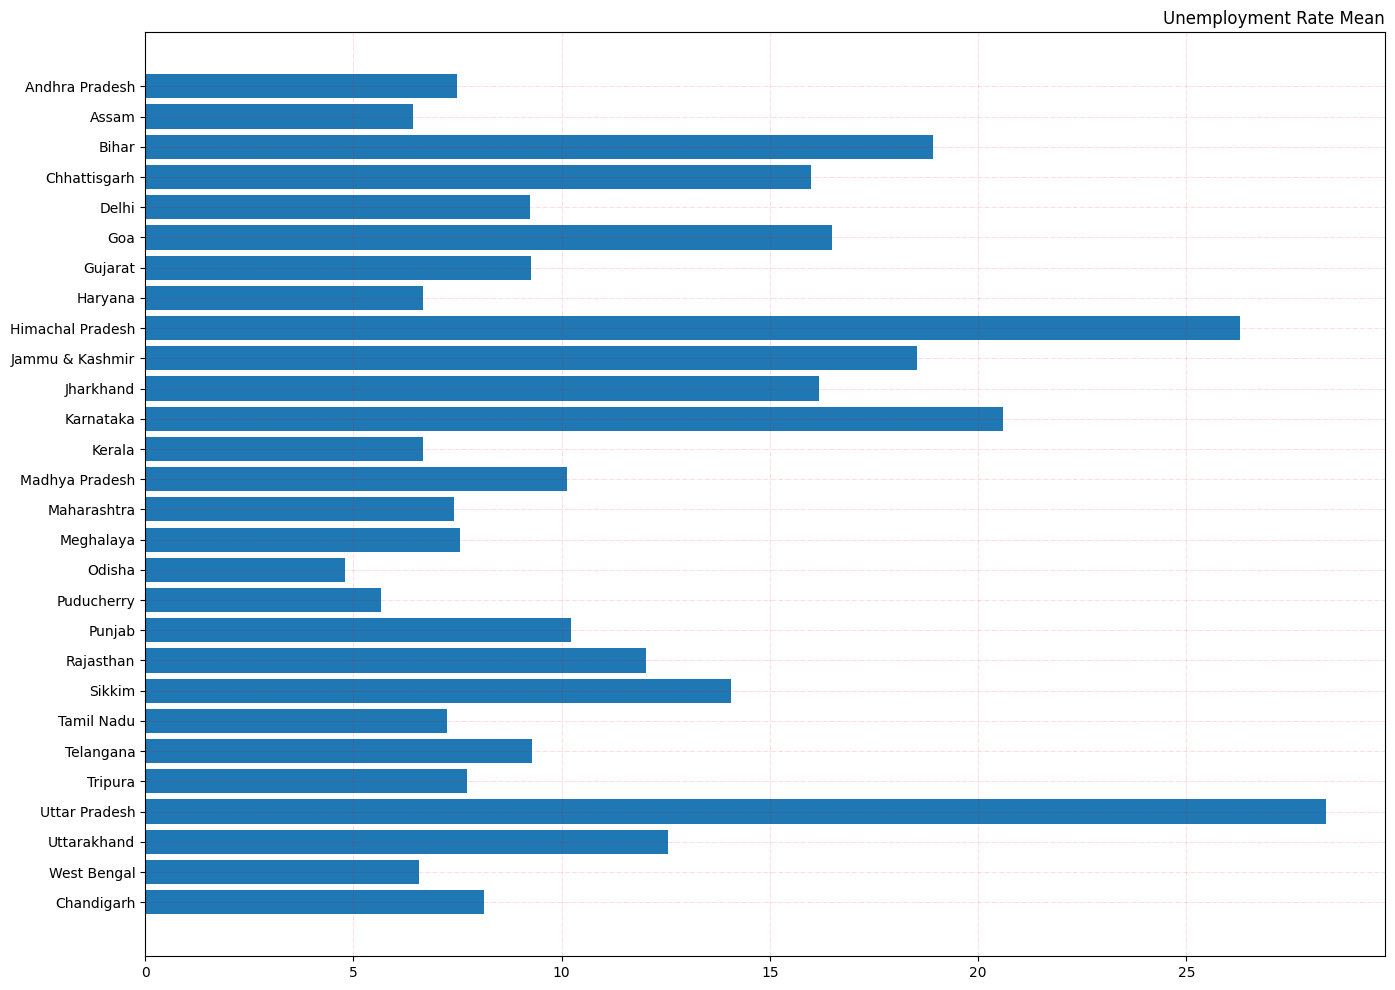

In [59]:
mean1=dataset.groupby(['Region'],as_index=False)[['Unemployment Rate']].mean()
# print(mean1['Unemployment Rate'])
fig,ax=plt.subplots(figsize=(16,12))
ax.barh(region,mean1['Unemployment Rate'])
ax.invert_yaxis()
ax.set_title("Unemployment Rate Mean",loc="right")
ax.grid(color='red',linestyle='-.',linewidth=0.5,alpha=0.2)
plt.show()

In [60]:
mean1=pd.DataFrame(mean1).reset_index(drop=True)
mean1['Region']=region
fig=px.bar(mean1, x="Region",y="Unemployment Rate",color="Region",title="Unemployment Rate ")
fig.show()

In [58]:
estimated_employed_mean=pd.DataFrame(dataset.groupby(['Region'],as_index=False)[['Estimated Employed']].mean()).reset_index(drop=True)
# print(estimated_employed_mean)
px.bar(estimated_employed_mean,x='Region',y='Estimated Employed', color='Region',title='Estimated Employed mean for State')

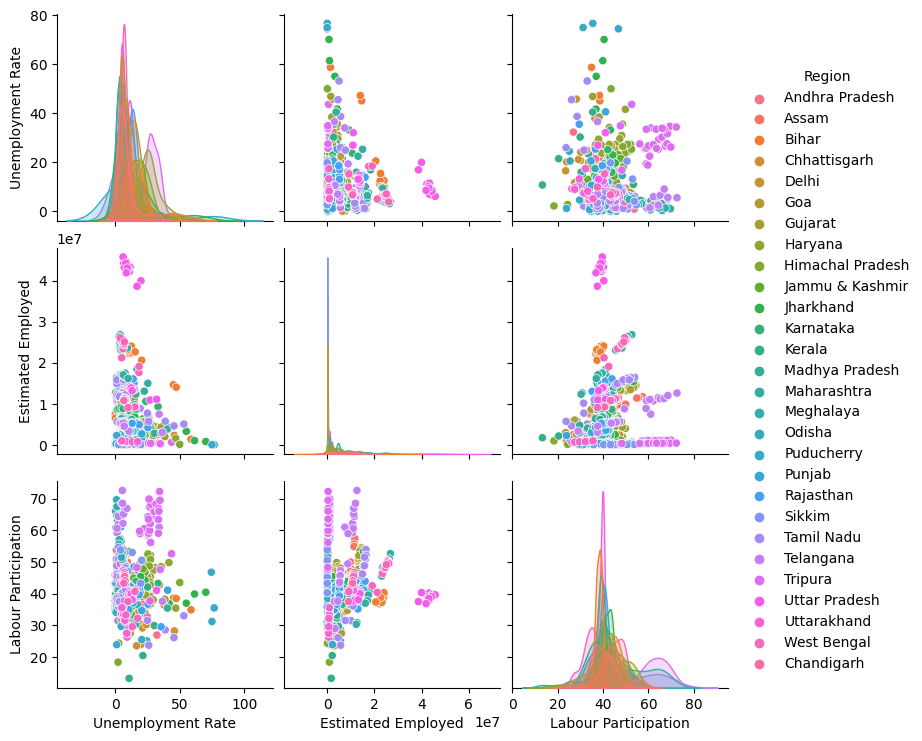

In [17]:
sns.pairplot(dataset,hue='Region')

<Axes: >

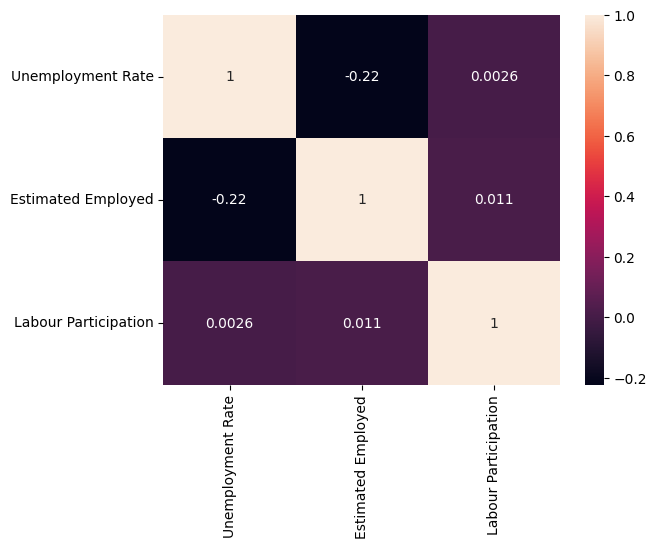

In [18]:
sns.heatmap(dataset[['Unemployment Rate','Estimated Employed','Labour Participation']].corr(), annot=True)

In [19]:
px.sunburst(dataset[["Region","Unemployment Rate","Area"]],path=['Area','Region'], values="Unemployment Rate", title='Unemployment Rate in every State',height=700)

In [20]:
px.sunburst(dataset[["Region","Estimated Employed","Area"]],path=['Area','Region'], values="Estimated Employed", title='Employment Rate in every State',height=700)

## Unemployment_Rate_upto_11_2020 dataset

In [21]:
dataset1=pd.read_csv("dataset/Unemployment_Rate_upto_11_2020.csv")

dataset1=dataset1.rename(columns={dataset1.columns[0]:'Region',dataset1.columns[1]:'Date',dataset1.columns[2]:'Frequency',
                                    dataset1.columns[3]:'Unemployment Rate',dataset1.columns[4]:'Employed',
                                  dataset1.columns[5]:'Labour Participation Rate',dataset1.columns[6]:'Region.1',
                                  dataset1.columns[7]:'long',dataset1.columns[8]:'lat'})
print(dataset1.sample(3))
print(dataset1.isnull().sum())


        Region         Date Frequency  Unemployment Rate  Employed  \
155  Meghalaya   31-07-2020         M               2.10   1448106   
67     Gujarat   31-08-2020         M               1.87  22817232   
16       Assam   31-07-2020         M               3.77  10286757   

     Labour Participation Rate   Region.1     long      lat  
155                      62.96  Northeast  25.4670  91.3662  
67                       43.55       West  22.2587  71.1924  
16                       40.88  Northeast  26.2006  92.9376  
Region                       0
Date                         0
Frequency                    0
Unemployment Rate            0
Employed                     0
Labour Participation Rate    0
Region.1                     0
long                         0
lat                          0
dtype: int64


<Axes: >

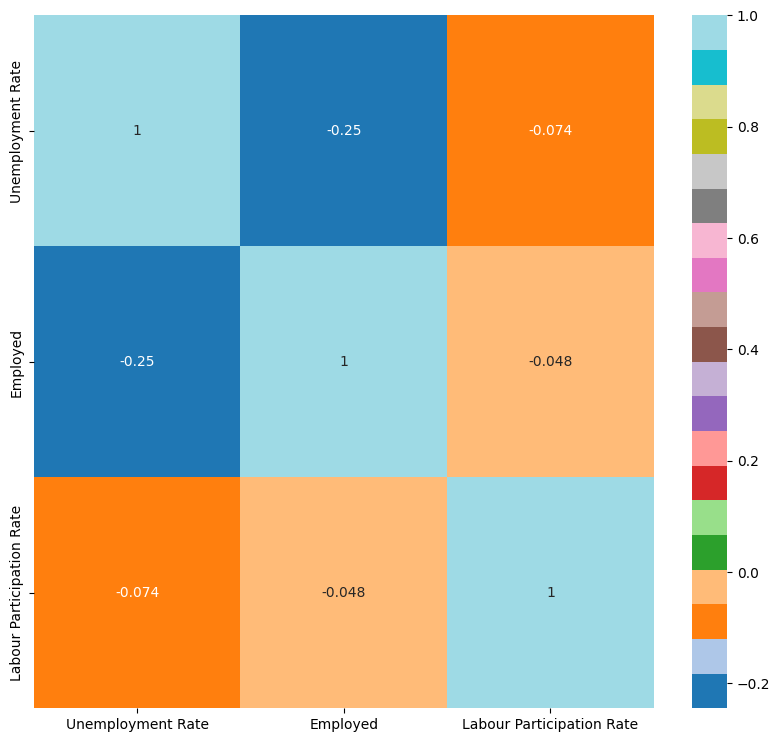

In [22]:
heatmaps=dataset1[['Unemployment Rate','Employed','Labour Participation Rate']]
heatmaps=heatmaps.corr()
plt.figure(figsize=(10,9))
sns.heatmap(data=heatmaps ,cmap='tab20',annot=True)

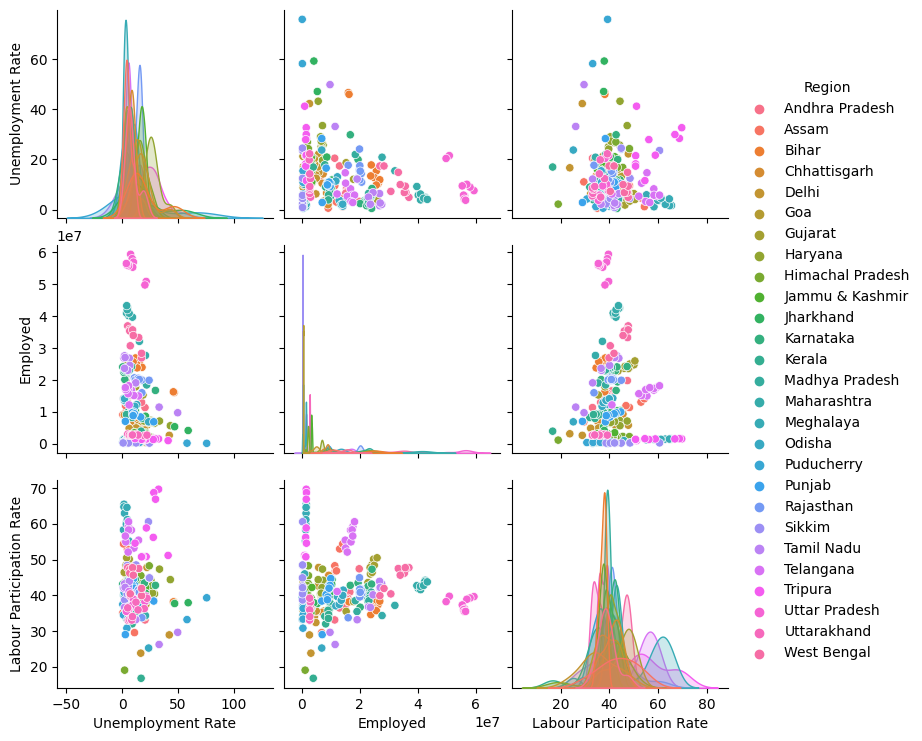

In [23]:
sns.pairplot(dataset1[['Region','Unemployment Rate','Employed','Labour Participation Rate']],hue="Region")

In [57]:
temp=pd.DataFrame(dataset1.groupby("Region",as_index=False)['Unemployment Rate'].mean())
px.bar(temp,x='Region',y='Unemployment Rate',color='Region',title="Unemployment rate of India by State")

In [29]:
px.sunburst(dataset1[['Region','Region.1','Unemployment Rate']], path=['Region.1','Region'],values='Unemployment Rate',title="Unemplyment rate between 2011 and 2020", height=700)